## 1. Cargar / Importar dataset

##### ----------------------------------------------------------------------------------------------------------------------

### Importar Librerias

In [1]:
import csv
import pandas as pd
import json
from pymongo import MongoClient
from PIL import Image
import requests
import re
from datetime import datetime
from prettytable import PrettyTable

### Crear conexion con mongo

In [2]:
MONGO_URI = 'mongodb://localhost'

In [3]:
client = MongoClient(MONGO_URI)

### Listar bases de datos existentes

Permite conocer la lista de bases de datos creadas

In [4]:
print(client.list_database_names())

['admin', 'clases', 'config', 'local', 'nuevo']


### Definir Base de datos y colleciones

In [5]:
db = client['TareaNoSQL']

In [6]:
cplayers = db['Players']
cplayervaluation = db['PlayerValuations']
cclubs = db['Clubs']
cappearances = db['Appearances']

### Primera forma de importar datos

Definimos los header de cada tabla para asignarlos a los datasets

In [7]:
header = ["player_id","first_name","last_name","name","last_season","current_club_id","player_code","country_of_birth","city_of_birth","country_of_citizenship","date_of_birth","sub_position","position","foot","height_in_cm","market_value_in_eur","highest_market_value_in_eur","contract_expiration_date","agent_name","image_url","url","current_club_domestic_competition_id","current_club_name"]

"r" sirve para declarar que el comando es de lectura (read)

In [8]:
csvFile = open("C:/Users/jr119/Downloads/transfermarkt/players.csv","r")

In [9]:
reader = csv.DictReader(csvFile)

Mostramos los datos de cada fichero

In [10]:
for each in reader:
    row={}
    for field in header:
        row[field] = each[field]
    print(row)

{'player_id': '598', 'first_name': 'Timo', 'last_name': 'Hildebrand', 'name': 'Timo Hildebrand', 'last_season': '2014', 'current_club_id': '24', 'player_code': 'timo-hildebrand', 'country_of_birth': 'Germany', 'city_of_birth': 'Worms', 'country_of_citizenship': 'Germany', 'date_of_birth': '1979-04-05', 'sub_position': 'Goalkeeper', 'position': 'Goalkeeper', 'foot': '', 'height_in_cm': '', 'market_value_in_eur': '', 'highest_market_value_in_eur': '10000000', 'contract_expiration_date': '', 'agent_name': '', 'image_url': 'https://img.a.transfermarkt.technology/portrait/header/598-1540373444.jpg?lm=1', 'url': 'https://www.transfermarkt.co.uk/timo-hildebrand/profil/spieler/598', 'current_club_domestic_competition_id': 'L1', 'current_club_name': 'Eintracht Frankfurt'}
{'player_id': '670', 'first_name': 'Martin', 'last_name': 'Petrov', 'name': 'Martin Petrov', 'last_season': '2012', 'current_club_id': '714', 'player_code': 'martin-petrov', 'country_of_birth': 'Bulgaria', 'city_of_birth': 'Vr

UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 1870: character maps to <undefined>

### Segunda Forma de importar datos

Se realiza la lectura de los csv asignandolos a una variable

In [12]:
players = pd.read_csv("C:/Users/jr119/Downloads/transfermarkt/players.csv")
player_valuations = pd.read_csv("C:/Users/jr119/Downloads/transfermarkt/player_valuations.csv")
clubs = pd.read_csv("C:/Users/jr119/Downloads/transfermarkt/clubs.csv")
appearances = pd.read_csv("C:/Users/jr119/Downloads/transfermarkt/appearances.csv")

Convertimos a dicccionarios las variables generadas anteriormente que leian los ficheros csv

In [13]:
df_players = players.to_dict(orient = "records")
df_player_valuations = player_valuations.to_dict(orient = "records")
df_clubs = clubs.to_dict(orient = "records")
df_appearances = appearances.to_dict(orient = "records")

Insertamos los datos en el formato json a cada coleccion

In [14]:
db.cplayers.insert_many(df_players)
db.cplayervaluation.insert_many(df_player_valuations)
db.cclubs.insert_many(df_clubs)
db.cappearances.insert_many(df_appearances)

Si deseamos ver los datos hacemos un bucle para recorrer todos los documentos y en este caso los mostramos como un dataframe para facilitar la lectura de los mismos

In [15]:
rplayers = [data for data in db.cplayers.find()]
dfplayers = pd.DataFrame(rplayers)
print(dfplayers)

                            _id  player_id first_name    last_name  \
0      6542d7580a034ff79529e10c        598       Timo   Hildebrand   
1      6542d7580a034ff79529e10d        670     Martin       Petrov   
2      6542d7580a034ff79529e10e       1323     Martin      Amedick   
3      6542d7580a034ff79529e10f       3195   Jermaine      Pennant   
4      6542d7580a034ff79529e110       3259     Damien         Duff   
...                         ...        ...        ...          ...   
30297  6542d7590a034ff7952a5765     371851       Jaka        Bijol   
30298  6542d7590a034ff7952a5766     537171     Semuel  Pizzignacco   
30299  6542d7590a034ff7952a5767     586756      Festy      Ebosele   
30300  6542d7590a034ff7952a5768     704692     Nicolò      Cocetta   
30301  6542d7590a034ff7952a5769     925584       Axel     Guessand   

                     name  last_season  current_club_id         player_code  \
0         Timo Hildebrand         2014               24     timo-hildebrand   
1

Si se desea leer los datos como se encuentran almacenados solo generamos un bucle que recorra el cursor generado

In [16]:
for x in db.cplayers.find({}):
    print(x)

{'_id': ObjectId('6542d7580a034ff79529e10c'), 'player_id': 598, 'first_name': 'Timo', 'last_name': 'Hildebrand', 'name': 'Timo Hildebrand', 'last_season': 2014, 'current_club_id': 24, 'player_code': 'timo-hildebrand', 'country_of_birth': 'Germany', 'city_of_birth': 'Worms', 'country_of_citizenship': 'Germany', 'date_of_birth': '1979-04-05', 'sub_position': 'Goalkeeper', 'position': 'Goalkeeper', 'foot': nan, 'height_in_cm': nan, 'market_value_in_eur': nan, 'highest_market_value_in_eur': 10000000.0, 'contract_expiration_date': nan, 'agent_name': nan, 'image_url': 'https://img.a.transfermarkt.technology/portrait/header/598-1540373444.jpg?lm=1', 'url': 'https://www.transfermarkt.co.uk/timo-hildebrand/profil/spieler/598', 'current_club_domestic_competition_id': 'L1', 'current_club_name': 'Eintracht Frankfurt'}
{'_id': ObjectId('6542d7580a034ff79529e10d'), 'player_id': 670, 'first_name': 'Martin', 'last_name': 'Petrov', 'name': 'Martin Petrov', 'last_season': 2012, 'current_club_id': 714, '

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



{'_id': ObjectId('6542d7580a034ff7952a0c30'), 'player_id': 44727, 'first_name': 'Grégory', 'last_name': 'Bettiol', 'name': 'Grégory Bettiol', 'last_season': 2012, 'current_club_id': 1095, 'player_code': 'gregory-bettiol', 'country_of_birth': 'France', 'city_of_birth': 'Villefranche-sur-Saône', 'country_of_citizenship': 'France', 'date_of_birth': '1986-03-30', 'sub_position': 'Centre-Forward', 'position': 'Attack', 'foot': 'right', 'height_in_cm': 180.0, 'market_value_in_eur': nan, 'highest_market_value_in_eur': 800000.0, 'contract_expiration_date': nan, 'agent_name': nan, 'image_url': 'https://img.a.transfermarkt.technology/portrait/header/s_44727_3524_2012_2.jpg?lm=1', 'url': 'https://www.transfermarkt.co.uk/gregory-bettiol/profil/spieler/44727', 'current_club_domestic_competition_id': 'FR1', 'current_club_name': 'ESTAC Troyes'}
{'_id': ObjectId('6542d7580a034ff7952a0c31'), 'player_id': 45227, 'first_name': 'Mehmet', 'last_name': 'Uslu', 'name': 'Mehmet Uslu', 'last_season': 2018, 'cu

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



##### ----------------------------------------------------------------------------------------------------------------------

## 2. Ejercicios sobre inserción, actualización, proyección y filtrado

### Deseamos insertar algunos jugaores porque nos ha llegado una demanda del porque no estan dentro de nuestra bases de datos si son conocidos mundialmente por lo cual procederemos a incluirlos

In [17]:
document_to_insert = [
    {
        "player_id": '587698',
        "first_name": 'Paolo',
        "last_name": 'Guerrero',
        "name": 'Paolo Guerrero',
        "last_season": 2023,
        "current_club_id": '14172',
        "player_code": 'paolo-guerrero',
        "country_of_birth": 'Peru',
        "city_of_birth": 'Lima',
        "country_of_citizenship": 'Peru',
        "date_of_birth": '1984-01-01',
        "sub_position": 'Centre-Forward',
        "position": 'Attack',
        "foot": 'right',
        "height_in_cm": 185,
        "market_value_in_eur": 35000,
        "highest_market_value_in_eur": 8000000,
        "contract_expiration_date": '2023-12-31 00:00:00',
        "agent_name": '',
        "image_url": 'https://img.a.transfermarkt.technology/portrait/header/2989-1687728679.jpg?lm=1',
        "url": 'https://www.transfermarkt.es/paolo-guerrero/profil/spieler/2989',
        "current_club_domestic_competition_id": 'ECUA1',
        "current_club_name": 'LDU Quito'
    }
]

In [18]:
result = db.cplayers.insert_many(document_to_insert)

In [19]:
for inserted_id in result.inserted_ids:
    print(f"Documento insertado con ID: {inserted_id}")

Documento insertado con ID: 6542d78b0a034ff79547bdec


In [20]:
for i in db.cplayers.find({"name":"Paolo Guerrero"},{}):
    print(i)

{'_id': ObjectId('6542d78b0a034ff79547bdec'), 'player_id': '587698', 'first_name': 'Paolo', 'last_name': 'Guerrero', 'name': 'Paolo Guerrero', 'last_season': 2023, 'current_club_id': '14172', 'player_code': 'paolo-guerrero', 'country_of_birth': 'Peru', 'city_of_birth': 'Lima', 'country_of_citizenship': 'Peru', 'date_of_birth': '1984-01-01', 'sub_position': 'Centre-Forward', 'position': 'Attack', 'foot': 'right', 'height_in_cm': 185, 'market_value_in_eur': 35000, 'highest_market_value_in_eur': 8000000, 'contract_expiration_date': '2023-12-31 00:00:00', 'agent_name': '', 'image_url': 'https://img.a.transfermarkt.technology/portrait/header/2989-1687728679.jpg?lm=1', 'url': 'https://www.transfermarkt.es/paolo-guerrero/profil/spieler/2989', 'current_club_domestic_competition_id': 'ECUA1', 'current_club_name': 'LDU Quito'}


Insertamos una columna que sea la edad de los jugadores la cual nos servira para proximos analisis, sin embargo al tener algunos valores vacios para el campo de "date_of_birth" hacemos un manejo de errores para evitar warnings o errores

In [21]:
for document in db.cplayers.find({}):
    date_of_birth = document.get('date_of_birth')

    if date_of_birth:
        try:
            birth_date = datetime.strptime(str(date_of_birth), '%Y-%m-%d')
            today = datetime.now()
            age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
        except ValueError:
            age = None
    else:
        age = None
    db.cplayers.update_one({'_id': document['_id']}, {'$set': {'age': age}})

Evidenciamos que se haya generado el campo age en la colección para ello ejecutamos un loop que recorre el cursor limitando la salida a 1 documento

In [22]:
for i in db.cplayers.find({}).limit(1):
    print(i)

{'_id': ObjectId('6542d7580a034ff79529e10c'), 'player_id': 598, 'first_name': 'Timo', 'last_name': 'Hildebrand', 'name': 'Timo Hildebrand', 'last_season': 2014, 'current_club_id': 24, 'player_code': 'timo-hildebrand', 'country_of_birth': 'Germany', 'city_of_birth': 'Worms', 'country_of_citizenship': 'Germany', 'date_of_birth': '1979-04-05', 'sub_position': 'Goalkeeper', 'position': 'Goalkeeper', 'foot': nan, 'height_in_cm': nan, 'market_value_in_eur': nan, 'highest_market_value_in_eur': 10000000.0, 'contract_expiration_date': nan, 'agent_name': nan, 'image_url': 'https://img.a.transfermarkt.technology/portrait/header/598-1540373444.jpg?lm=1', 'url': 'https://www.transfermarkt.co.uk/timo-hildebrand/profil/spieler/598', 'current_club_domestic_competition_id': 'L1', 'current_club_name': 'Eintracht Frankfurt', 'age': 44}


Se procede a crear el campo rango de edad para poder analizar los minutos jugados por rango de edad de los jugadores en un análisis posterior

In [23]:
for document in db.cplayers.find({"age":{'$ne': None}},{}):
    age = document['age']
    if age <= 18:
        document['ageRange'] = '1. Menor a 18'
    elif 18 < age <= 23:
        document['ageRange'] = '2. De 18 a 23'
    elif 23 < age <= 27:
        document['ageRange'] = '3. De 23 a 27'
    elif 27 < age <= 30:
        document['ageRange'] = '4. De 27 a 30'
    elif 30 < age <= 35:
        document['ageRange'] = '5. De 30 a 35'        
    else:
        document['ageRange'] = '6. Mayor a 35'
    db.cplayers.update_one({'_id': document['_id']}, {'$set': {'ageRange': document['ageRange']}})

Evidenciamos que se haya generado el campo ageRange en la colección para ello ejecutamos un loop que recorre el cursor limitando la salida a 1 documento

In [24]:
for i in db.cplayers.find({}).limit(1):
    print(i)

{'_id': ObjectId('6542d7580a034ff79529e10c'), 'player_id': 598, 'first_name': 'Timo', 'last_name': 'Hildebrand', 'name': 'Timo Hildebrand', 'last_season': 2014, 'current_club_id': 24, 'player_code': 'timo-hildebrand', 'country_of_birth': 'Germany', 'city_of_birth': 'Worms', 'country_of_citizenship': 'Germany', 'date_of_birth': '1979-04-05', 'sub_position': 'Goalkeeper', 'position': 'Goalkeeper', 'foot': nan, 'height_in_cm': nan, 'market_value_in_eur': nan, 'highest_market_value_in_eur': 10000000.0, 'contract_expiration_date': nan, 'agent_name': nan, 'image_url': 'https://img.a.transfermarkt.technology/portrait/header/598-1540373444.jpg?lm=1', 'url': 'https://www.transfermarkt.co.uk/timo-hildebrand/profil/spieler/598', 'current_club_domestic_competition_id': 'L1', 'current_club_name': 'Eintracht Frankfurt', 'age': 44, 'ageRange': '6. Mayor a 35'}


### Deseamos actualizar los campos referentes a los nombres de los jugadores para evitar problemas en el estampado de su camiseta

Hemos detectado que para el jugador "Cristiano Ronaldo" tiene como apellido su nombre completo por lo cual actualizaremos los campos relacionados a sus nombres y apellidos para tener un estandar en los campos

In [25]:
for i in db.cplayers.find({"name":"Cristiano Ronaldo"},{}):
    print(i)

{'_id': ObjectId('6542d7580a034ff79529ee16'), 'player_id': 8198, 'first_name': nan, 'last_name': 'Cristiano Ronaldo', 'name': 'Cristiano Ronaldo', 'last_season': 2022, 'current_club_id': 985, 'player_code': 'cristiano-ronaldo', 'country_of_birth': 'Portugal', 'city_of_birth': 'Funchal', 'country_of_citizenship': 'Portugal', 'date_of_birth': '1985-02-05', 'sub_position': 'Centre-Forward', 'position': 'Attack', 'foot': 'right', 'height_in_cm': 187.0, 'market_value_in_eur': 15000000.0, 'highest_market_value_in_eur': 120000000.0, 'contract_expiration_date': '2025-06-30 00:00:00', 'agent_name': 'Gestifute', 'image_url': 'https://img.a.transfermarkt.technology/portrait/header/8198-1685035469.png?lm=1', 'url': 'https://www.transfermarkt.co.uk/cristiano-ronaldo/profil/spieler/8198', 'current_club_domestic_competition_id': 'GB1', 'current_club_name': 'Manchester United', 'age': 38, 'ageRange': '6. Mayor a 35'}


In [26]:
new_values = {
    "first_name": "Cristiano",
    "last_name": "dos Santos Aveiro",
    "name": "Cristiano Ronaldo dos Santos Aveiro"    
}

In [27]:
for field, new_value in new_values.items():
    filter_query = {"name":"Cristiano Ronaldo"}
    update_query = {'$set': {field: new_value}}
    result = db.cplayers.update_many(filter_query, update_query)
    print(f" {result.modified_count} documento(s) actualizado(s) para {field}.")

 1 documento(s) actualizado(s) para first_name.
 1 documento(s) actualizado(s) para last_name.
 1 documento(s) actualizado(s) para name.


Mostramos nuevamente el registro que pertenece a "Cristiano Ronaldo" para validar que sus datos actualmente esten correctos 

In [28]:
for i in db.cplayers.find({"name":"Cristiano Ronaldo dos Santos Aveiro"},{}):
    print(i)

{'_id': ObjectId('6542d7580a034ff79529ee16'), 'player_id': 8198, 'first_name': 'Cristiano', 'last_name': 'dos Santos Aveiro', 'name': 'Cristiano Ronaldo dos Santos Aveiro', 'last_season': 2022, 'current_club_id': 985, 'player_code': 'cristiano-ronaldo', 'country_of_birth': 'Portugal', 'city_of_birth': 'Funchal', 'country_of_citizenship': 'Portugal', 'date_of_birth': '1985-02-05', 'sub_position': 'Centre-Forward', 'position': 'Attack', 'foot': 'right', 'height_in_cm': 187.0, 'market_value_in_eur': 15000000.0, 'highest_market_value_in_eur': 120000000.0, 'contract_expiration_date': '2025-06-30 00:00:00', 'agent_name': 'Gestifute', 'image_url': 'https://img.a.transfermarkt.technology/portrait/header/8198-1685035469.png?lm=1', 'url': 'https://www.transfermarkt.co.uk/cristiano-ronaldo/profil/spieler/8198', 'current_club_domestic_competition_id': 'GB1', 'current_club_name': 'Manchester United', 'age': 38, 'ageRange': '6. Mayor a 35'}


Hemos detectado que para el jugador "Neymar" sus valores de "first_name" y "last_name" son incorrectos por lo cual actualizaremos los campos relacionados a sus nombres y apellidos para tener un estandar en los campos

In [29]:
for i in db.cplayers.find({"name":"Neymar"},{}):
    print(i)

{'_id': ObjectId('6542d7590a034ff7952a299b'), 'player_id': 68290, 'first_name': nan, 'last_name': 'Neymar', 'name': 'Neymar', 'last_season': 2022, 'current_club_id': 583, 'player_code': 'neymar', 'country_of_birth': 'Brazil', 'city_of_birth': 'Mogi das Cruzes', 'country_of_citizenship': 'Brazil', 'date_of_birth': '1992-02-05', 'sub_position': 'Left Winger', 'position': 'Attack', 'foot': 'right', 'height_in_cm': 175.0, 'market_value_in_eur': 60000000.0, 'highest_market_value_in_eur': 180000000.0, 'contract_expiration_date': '2025-06-30 00:00:00', 'agent_name': nan, 'image_url': 'https://img.a.transfermarkt.technology/portrait/header/68290-1669394812.jpg?lm=1', 'url': 'https://www.transfermarkt.co.uk/neymar/profil/spieler/68290', 'current_club_domestic_competition_id': 'FR1', 'current_club_name': 'Paris Saint-Germain', 'age': 31, 'ageRange': '5. De 30 a 35'}


In [30]:
new_values = {
    "first_name": "Neymar",
    "last_name": "da Silva Santos",
    "name": "Neymar da Silva Santos"    
}

In [31]:
for field, new_value in new_values.items():
    filter_query = {"name":"Neymar"}
    update_query = {'$set': {field: new_value}}
    result = db.cplayers.update_many(filter_query, update_query)
    print(f" {result.modified_count} documento(s) actualizado(s) para {field}.")

 1 documento(s) actualizado(s) para first_name.
 1 documento(s) actualizado(s) para last_name.
 1 documento(s) actualizado(s) para name.


In [32]:
for i in db.cplayers.find({"name":"Neymar da Silva Santos"},{}):
    print(i)

{'_id': ObjectId('6542d7590a034ff7952a299b'), 'player_id': 68290, 'first_name': 'Neymar', 'last_name': 'da Silva Santos', 'name': 'Neymar da Silva Santos', 'last_season': 2022, 'current_club_id': 583, 'player_code': 'neymar', 'country_of_birth': 'Brazil', 'city_of_birth': 'Mogi das Cruzes', 'country_of_citizenship': 'Brazil', 'date_of_birth': '1992-02-05', 'sub_position': 'Left Winger', 'position': 'Attack', 'foot': 'right', 'height_in_cm': 175.0, 'market_value_in_eur': 60000000.0, 'highest_market_value_in_eur': 180000000.0, 'contract_expiration_date': '2025-06-30 00:00:00', 'agent_name': nan, 'image_url': 'https://img.a.transfermarkt.technology/portrait/header/68290-1669394812.jpg?lm=1', 'url': 'https://www.transfermarkt.co.uk/neymar/profil/spieler/68290', 'current_club_domestic_competition_id': 'FR1', 'current_club_name': 'Paris Saint-Germain', 'age': 31, 'ageRange': '5. De 30 a 35'}


### Se busca proyectar los 15 jugadores que tienen una talla mayor a 175 cm

In [33]:
for i in db.cplayers.find({ "height_in_cm": { "$gt": 175} },{"name":1,"height_in_cm":1,"current_club_name":1,"position":1,"_id":0}).sort("height_in_cm",-1).limit(15):
    print(i)

{'name': 'Kristof Van Hout', 'position': 'Goalkeeper', 'height_in_cm': 207.0, 'current_club_name': 'KVC Westerlo'}
{'name': 'Kjell Scherpen', 'position': 'Goalkeeper', 'height_in_cm': 206.0, 'current_club_name': 'Vitesse Arnhem'}
{'name': 'Denys Tvardovskyi', 'position': 'Goalkeeper', 'height_in_cm': 206.0, 'current_club_name': 'Shakhtar Donetsk'}
{'name': 'Kevin Gadellaa', 'position': 'Goalkeeper', 'height_in_cm': 206.0, 'current_club_name': 'FC Utrecht'}
{'name': 'Isaak Touré', 'position': 'Defender', 'height_in_cm': 206.0, 'current_club_name': 'FC Lorient'}
{'name': 'Norbert Haymamba', 'position': 'Goalkeeper', 'height_in_cm': 205.0, 'current_club_name': 'FC Arouca'}
{'name': 'Vanja Ivesa', 'position': 'Goalkeeper', 'height_in_cm': 205.0, 'current_club_name': 'Elazigspor'}
{'name': 'Tom Hülsmann', 'position': 'Goalkeeper', 'height_in_cm': 205.0, 'current_club_name': 'Bayern Munich'}
{'name': 'Lucas Bergström', 'position': 'Goalkeeper', 'height_in_cm': 205.0, 'current_club_name': 'Ch

### Buscaremos a los 15 jugadores más jóvenes de las 5 grandes ligas para darles seguimiento en su crecimiento futbolístico, para presentar mejor los datos los mostraremos en formato tabla

In [34]:
tabla1 = PrettyTable()
tabla1.field_names = ["name", "height_in_cm","current_club_name","position","age"]
for documento in db.cplayers.find({"current_club_domestic_competition_id":
                                   {"$in":["L1","ES1","GB1","IT1","FR1"]},
                                   "$and":[{"age":{'$ne': None}}]},
                                  {"name":1,"height_in_cm":1,"current_club_name":1,"position":1,"age":1,"_id":0}).sort("age",1).limit(15):
    campo1 = documento["name"]
    campo2 = documento["height_in_cm"]
    campo3 = documento["current_club_name"]
    campo4 = documento["position"]
    campo5 = documento["age"]
    tabla1.add_row([campo1, campo2, campo3,campo4, campo5])
print(tabla1)

+--------------------+--------------+---------------------+------------+-----+
|        name        | height_in_cm |  current_club_name  |  position  | age |
+--------------------+--------------+---------------------+------------+-----+
|    Ethan Mbappé    |    176.0     | Paris Saint-Germain |  Midfield  |  16 |
|   Ethan Nwaneri    |    165.0     |      Arsenal FC     |  Midfield  |  16 |
|   David Pejičić    |     nan      |    Udinese Calcio   |  Midfield  |  16 |
|  Amidou Doumbouya  |    182.0     |       OGC Nice      |  Defender  |  16 |
| Tommaso Vannucchi  |    197.0     |    ACF Fiorentina   | Goalkeeper |  16 |
|    Lamine Yamal    |    180.0     |     FC Barcelona    |   Attack   |  16 |
|    Mamadu Silla    |     nan      |      AC Ajaccio     |  Missing   |  16 |
|    David Odogu     |    190.0     |    VfL Wolfsburg    |  Defender  |  17 |
|  Bastien Meupiyou  |    191.0     |      FC Nantes      |  Defender  |  17 |
|    Archie Gray     |     nan      |     Leeds Unit

### Deseamos ver los 5 estadios de las 5 grandes ligas que pueden albergar la mayor cantidad de asistentes para un partido de futbol

In [35]:
tabla2 = PrettyTable()
tabla2.field_names = ["name", "stadium_name","stadium_seats"]
for documento in db.cclubs.find({"domestic_competition_id":{"$in":["L1","ES1","GB1","IT1","FR1"]},
                                 "$and":[{"last_season": 2023}]},
                                {"name":1,"stadium_name":1,"stadium_seats":1,"_id":0}).sort("stadium_seats",-1).limit(5):
    campo1 = documento["name"]
    campo2 = documento["stadium_name"]
    campo3 = documento["stadium_seats"]
    tabla2.add_row([campo1, campo2, campo3])
print(tabla2)

+-------------------+-------------------+---------------+
|        name       |    stadium_name   | stadium_seats |
+-------------------+-------------------+---------------+
| Borussia Dortmund | SIGNAL IDUNA PARK |     81365     |
|    Real Madrid    | Santiago Bernabéu |     81044     |
|      AC Milan     |  Giuseppe Meazza  |     75923     |
|    Inter Milan    |  Giuseppe Meazza  |     75923     |
|   Bayern Munich   |   Allianz Arena   |     75024     |
+-------------------+-------------------+---------------+


### Deseamos filtrar a un jugador especifico entonces colocamos el campo por el cual se desea filtrar

En este caso filtraremos mediante el field "name" los valores de  "Cristiano Ronaldo dos Santos Aveiro" y mediante "last_name" el valor "Messi" 

In [36]:
for i in db.cplayers.find({"name":"Cristiano Ronaldo dos Santos Aveiro"},{}):
    print(i)
    cr7_url=i["image_url"]

{'_id': ObjectId('6542d7580a034ff79529ee16'), 'player_id': 8198, 'first_name': 'Cristiano', 'last_name': 'dos Santos Aveiro', 'name': 'Cristiano Ronaldo dos Santos Aveiro', 'last_season': 2022, 'current_club_id': 985, 'player_code': 'cristiano-ronaldo', 'country_of_birth': 'Portugal', 'city_of_birth': 'Funchal', 'country_of_citizenship': 'Portugal', 'date_of_birth': '1985-02-05', 'sub_position': 'Centre-Forward', 'position': 'Attack', 'foot': 'right', 'height_in_cm': 187.0, 'market_value_in_eur': 15000000.0, 'highest_market_value_in_eur': 120000000.0, 'contract_expiration_date': '2025-06-30 00:00:00', 'agent_name': 'Gestifute', 'image_url': 'https://img.a.transfermarkt.technology/portrait/header/8198-1685035469.png?lm=1', 'url': 'https://www.transfermarkt.co.uk/cristiano-ronaldo/profil/spieler/8198', 'current_club_domestic_competition_id': 'GB1', 'current_club_name': 'Manchester United', 'age': 38, 'ageRange': '6. Mayor a 35'}


Haremos uso de la libreria PIL para poder proyectar imagenes que vienen almacenadas en los datos

In [37]:
cr7_image = Image.open(requests.get(cr7_url, stream=True).raw)

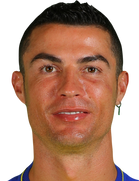

In [38]:
display(cr7_image) 
#cr7_image.show() #sirve para desplegar la imagen en un visor de imagenes de la PC

In [39]:
for i in db.cplayers.find({"last_name":"Messi"},{}):
    print(i)
    lm10_url=i["image_url"]

{'_id': ObjectId('6542d7580a034ff79529ee6b'), 'player_id': 28003, 'first_name': 'Lionel', 'last_name': 'Messi', 'name': 'Lionel Messi', 'last_season': 2022, 'current_club_id': 583, 'player_code': 'lionel-messi', 'country_of_birth': 'Argentina', 'city_of_birth': 'Rosario', 'country_of_citizenship': 'Argentina', 'date_of_birth': '1987-06-24', 'sub_position': 'Right Winger', 'position': 'Attack', 'foot': 'left', 'height_in_cm': 170.0, 'market_value_in_eur': 35000000.0, 'highest_market_value_in_eur': 180000000.0, 'contract_expiration_date': nan, 'agent_name': nan, 'image_url': 'https://img.a.transfermarkt.technology/portrait/header/28003-1671435885.jpg?lm=1', 'url': 'https://www.transfermarkt.co.uk/lionel-messi/profil/spieler/28003', 'current_club_domestic_competition_id': 'FR1', 'current_club_name': 'Paris Saint-Germain', 'age': 36, 'ageRange': '6. Mayor a 35'}


In [40]:
lm10_image = Image.open(requests.get(lm10_url, stream=True).raw)

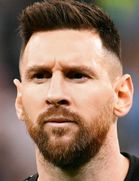

In [41]:
display(lm10_image) 
#lm10_image.show() #sirve para desplegar la imagen en un visor de imagenes de la PC

# 3. Ejercicios sobre pipeline de agregación

Necesitaremos generar el año en el cual se valoro al jugador para ello lo obtendremos a partir la columna datetime que es la fecha en la cual el jugador obtuvo dicho valor de mercado

In [42]:
for document in db.cplayervaluation.find({}):
    timestamp = document.get("datetime")
    if timestamp:
        year = timestamp[:4]
        db.cplayervaluation.update_many({'_id': document['_id']}, {'$set': {'year_valuation': int(year)}})

Presentamos los campos de los documentos en el cual se puede evidenciar el nuevo campo year_valuation

In [43]:
for x in db.cplayervaluation.find({}).limit(1):
    print(x)

{'_id': ObjectId('6542d75a0a034ff7952a576a'), 'player_id': 3132, 'last_season': 2013, 'datetime': '2003-12-09 00:00:00', 'date': '2003-12-09', 'dateweek': '2003-12-08', 'market_value_in_eur': 400000, 'n': 1, 'current_club_id': 126, 'player_club_domestic_competition_id': 'TR1', 'year_valuation': 2003}


Creamos una nueva colección en la cual almacenaremos los valores de los players filtrados para nuestro próximo analisis

In [44]:
cplayers_filtered = db['PlayersFiltered']

Insertaremos a la colección anterior los jugadores que hayan jugado las 2 ultimas temporadas en europa (2023,2022) asimismo tomaremos a los jugadores que pertenecen a las 5 grandes ligas europeas (Inglaterra, España, Francia, Alemania, Italia) obteniendo los valores del nombre del player, su id, la competición en la cual juegan y el actual club al cual pertenecen

In [45]:
inserted_ids = db.cplayers_filtered.insert_many(db.cplayers.find({"current_club_domestic_competition_id":{"$in":["L1","ES1","GB1","IT1","FR1"]}
                                                                  ,"$and":[{"last_season": {"$in":[2023,2022]}}]},
                                                           {"_id":0,"player_id":1,"name":1,"position":1,"current_club_domestic_competition_id":1,
                                                            "current_club_name":1,"age":1,"ageRange":1}))
print("Inserted document IDs:", inserted_ids.inserted_ids)

Inserted document IDs: [ObjectId('6542d8d40a034ff79547bded'), ObjectId('6542d8d40a034ff79547bdee'), ObjectId('6542d8d40a034ff79547bdef'), ObjectId('6542d8d40a034ff79547bdf0'), ObjectId('6542d8d40a034ff79547bdf1'), ObjectId('6542d8d40a034ff79547bdf2'), ObjectId('6542d8d40a034ff79547bdf3'), ObjectId('6542d8d40a034ff79547bdf4'), ObjectId('6542d8d40a034ff79547bdf5'), ObjectId('6542d8d40a034ff79547bdf6'), ObjectId('6542d8d40a034ff79547bdf7'), ObjectId('6542d8d40a034ff79547bdf8'), ObjectId('6542d8d40a034ff79547bdf9'), ObjectId('6542d8d40a034ff79547bdfa'), ObjectId('6542d8d40a034ff79547bdfb'), ObjectId('6542d8d40a034ff79547bdfc'), ObjectId('6542d8d40a034ff79547bdfd'), ObjectId('6542d8d40a034ff79547bdfe'), ObjectId('6542d8d40a034ff79547bdff'), ObjectId('6542d8d40a034ff79547be00'), ObjectId('6542d8d40a034ff79547be01'), ObjectId('6542d8d40a034ff79547be02'), ObjectId('6542d8d40a034ff79547be03'), ObjectId('6542d8d40a034ff79547be04'), ObjectId('6542d8d40a034ff79547be05'), ObjectId('6542d8d40a034ff7

Mostramos los datos que han sido insertados en la nueva colección la cual nos servira para nuestro análisis

In [46]:
for x in db.cplayers_filtered.find({}).limit(2):
    print(x)

{'_id': ObjectId('6542d8d40a034ff79547bded'), 'player_id': 18922, 'name': 'Karim Benzema', 'position': 'Attack', 'current_club_domestic_competition_id': 'ES1', 'current_club_name': 'Real Madrid', 'age': 35, 'ageRange': '5. De 30 a 35'}
{'_id': ObjectId('6542d8d40a034ff79547bdee'), 'player_id': 30321, 'name': 'Óscar Trejo', 'position': 'Midfield', 'current_club_domestic_competition_id': 'ES1', 'current_club_name': 'Rayo Vallecano', 'age': 35, 'ageRange': '5. De 30 a 35'}


Creamos una nueva colección adicional donde almacenaremos los valores de los valores de mercado de los jugadores

In [47]:
cplayervaluation_filtered = db['PlayersValuation_Filtered']

La siguiente query busca obtener la valoración jugadores que hayan jugado las 2 ultimas temporadas en europa (2023,2022) asimismo tomaremos a los jugadores que pertenecen a las 5 grandes ligas europeas (Inglaterra, España, Francia, Alemania, Italia); agruparemos los valores del id del jugador, el id de su actual club, el año de evaluación y realizaremos una agregación para obtener el maximo valor de mercado por cada año en el cual dicho jugador ha sido valorado, para facilitar la lectura haremos un mergeobjects para dividir el "id" generado en el agrupamiento en campos directos para referenciar.
Tomando en cuenta que la colección de valoraciones de los players tiene multiples registros de un jugador ya que un jugador puede tener una valoracion de mercado X en un momento Y determinado pero en otro momento Z puede tener una valoracion  W, por ello haremos un rank para poder obtener la maxima valoración que tuvo un jugador en el ultimo año que fue valorado, finalmente haremos un match para que ese valor del ranking sea el maximo valor que se valoro al jugador en ese año y una proyección para quitar el valor del ranking calculado.

In [48]:
pipeline = [
    {
        '$match': {
            "player_club_domestic_competition_id":{"$in":["L1","ES1","GB1","IT1","FR1"]},
            "$and":[{"last_season": {"$in":[2023,2022]}}]
        }
    },
    {
        '$group': {
            '_id': {
                "player_id" : "$player_id", "current_club_id" : "$current_club_id",
                "player_club_domestic_competition_id" : "$player_club_domestic_competition_id","year" : "$year_valuation"},
            'max_market_value_per_year': {'$max': f'${"market_value_in_eur"}'}
        }
    },
    { "$replaceWith": { "$mergeObjects": [ "$_id",{ "max_market_value_per_year": "$max_market_value_per_year"} ] } },
    {
      "$setWindowFields": {
         "partitionBy": "$player_id",
         "sortBy": { "year": -1 },
         "output": {
            "Ranking": {
               "$denseRank": {}
            }
         }
      }
   },
   {
       "$match":{
           "Ranking":1
       }
   },
   {
       "$project": {
           "Ranking":0
       }
   }
]

Finalmente mostraremos los datos que corresponden al maximo valor que tuvo un players en el ultimo año que tuvo una valoración

In [49]:
for i in db.cplayervaluation.aggregate(pipeline):
        print(i)

{'player_id': 2857, 'current_club_id': 29, 'player_club_domestic_competition_id': 'GB1', 'year': 2022, 'max_market_value_per_year': 250000}
{'player_id': 3333, 'current_club_id': 1237, 'player_club_domestic_competition_id': 'GB1', 'year': 2023, 'max_market_value_per_year': 1500000}
{'player_id': 3455, 'current_club_id': 5, 'player_club_domestic_competition_id': 'IT1', 'year': 2023, 'max_market_value_per_year': 2000000}
{'player_id': 5578, 'current_club_id': 1421, 'player_club_domestic_competition_id': 'FR1', 'year': 2023, 'max_market_value_per_year': 100000}
{'player_id': 7161, 'current_club_id': 15, 'player_club_domestic_competition_id': 'L1', 'year': 2023, 'max_market_value_per_year': 13000000}
{'player_id': 7663, 'current_club_id': 150, 'player_club_domestic_competition_id': 'ES1', 'year': 2023, 'max_market_value_per_year': 1500000}
{'player_id': 7825, 'current_club_id': 1050, 'player_club_domestic_competition_id': 'ES1', 'year': 2023, 'max_market_value_per_year': 700000}
{'player_i

Insertaremos los documentos obtenidos de la pasada agregación en la colección que creamos

In [50]:
inserted_ids = db.cplayervaluation_filtered.insert_many(db.cplayervaluation.aggregate(pipeline))
print("Inserted document IDs:", inserted_ids.inserted_ids)

Inserted document IDs: [ObjectId('6542d8d60a034ff79547cd73'), ObjectId('6542d8d60a034ff79547cd74'), ObjectId('6542d8d60a034ff79547cd75'), ObjectId('6542d8d60a034ff79547cd76'), ObjectId('6542d8d60a034ff79547cd77'), ObjectId('6542d8d60a034ff79547cd78'), ObjectId('6542d8d60a034ff79547cd79'), ObjectId('6542d8d60a034ff79547cd7a'), ObjectId('6542d8d60a034ff79547cd7b'), ObjectId('6542d8d60a034ff79547cd7c'), ObjectId('6542d8d60a034ff79547cd7d'), ObjectId('6542d8d60a034ff79547cd7e'), ObjectId('6542d8d60a034ff79547cd7f'), ObjectId('6542d8d60a034ff79547cd80'), ObjectId('6542d8d60a034ff79547cd81'), ObjectId('6542d8d60a034ff79547cd82'), ObjectId('6542d8d60a034ff79547cd83'), ObjectId('6542d8d60a034ff79547cd84'), ObjectId('6542d8d60a034ff79547cd85'), ObjectId('6542d8d60a034ff79547cd86'), ObjectId('6542d8d60a034ff79547cd87'), ObjectId('6542d8d60a034ff79547cd88'), ObjectId('6542d8d60a034ff79547cd89'), ObjectId('6542d8d60a034ff79547cd8a'), ObjectId('6542d8d60a034ff79547cd8b'), ObjectId('6542d8d60a034ff7

Finalmente mostramos como nos quedara nuestra nueva colección la cual ya contiene el ultimo año que un jugador fue valorado con el maximo valor de mercado que pudo tener ese jugador en ese año

In [51]:
for i in db.cplayervaluation_filtered.find({}):
    print(i)

{'_id': ObjectId('6542d8d60a034ff79547cd73'), 'player_id': 2857, 'current_club_id': 29, 'player_club_domestic_competition_id': 'GB1', 'year': 2022, 'max_market_value_per_year': 250000}
{'_id': ObjectId('6542d8d60a034ff79547cd74'), 'player_id': 3333, 'current_club_id': 1237, 'player_club_domestic_competition_id': 'GB1', 'year': 2023, 'max_market_value_per_year': 1500000}
{'_id': ObjectId('6542d8d60a034ff79547cd75'), 'player_id': 3455, 'current_club_id': 5, 'player_club_domestic_competition_id': 'IT1', 'year': 2023, 'max_market_value_per_year': 2000000}
{'_id': ObjectId('6542d8d60a034ff79547cd76'), 'player_id': 5578, 'current_club_id': 1421, 'player_club_domestic_competition_id': 'FR1', 'year': 2023, 'max_market_value_per_year': 100000}
{'_id': ObjectId('6542d8d60a034ff79547cd77'), 'player_id': 7161, 'current_club_id': 15, 'player_club_domestic_competition_id': 'L1', 'year': 2023, 'max_market_value_per_year': 13000000}
{'_id': ObjectId('6542d8d60a034ff79547cd78'), 'player_id': 7663, 'cur

Finalmente para completar el análisis realizaremos un join de las 2 colecciones generadas anteriormente para tener los datos completos y podemos obtener cuales son los 10 jugadores más valorados que han jugado los dos ultimos años en las 5 grandes ligas

In [52]:
pipeline = [
    {
        '$lookup': {
            'from': 'cplayervaluation_filtered',       
            'localField': 'player_id',  
            'foreignField': 'player_id',     
            'as': 'valuations'       
        }
    },
    {
        "$sort": {
            "valuations.max_market_value_per_year":-1
        }
    },
    {
        "$limit": 10
    },
    {
        '$project': {
            '_id': 0,
            'name': 1,           
            'market_value_value_last_year': {'$arrayElemAt': ['$valuations.max_market_value_per_year', 0]},  
            'last_year_valuation': {'$arrayElemAt': ['$valuations.year', 0]},  
            'current_club_name': 1,             
            'position': 1,             
            'age': 1            
        }
    }
]

Recorremos el cursor que nos mostrara los 10 jugadores más valiosos que han jugado la temporada 2022 y 2023 de las 5 grandes ligas

In [53]:
result = db.cplayers_filtered.aggregate(pipeline)
for i in result:
    print(i)

{'name': 'Erling Haaland', 'position': 'Attack', 'current_club_name': 'Manchester City', 'age': 23, 'market_value_value_last_year': 180000000, 'last_year_valuation': 2023}
{'name': 'Kylian Mbappé', 'position': 'Attack', 'current_club_name': 'Paris Saint-Germain', 'age': 24, 'market_value_value_last_year': 180000000, 'last_year_valuation': 2023}
{'name': 'Vinicius Junior', 'position': 'Attack', 'current_club_name': 'Real Madrid', 'age': 23, 'market_value_value_last_year': 150000000, 'last_year_valuation': 2023}
{'name': 'Victor Osimhen', 'position': 'Attack', 'current_club_name': 'SSC Napoli', 'age': 24, 'market_value_value_last_year': 120000000, 'last_year_valuation': 2023}
{'name': 'Jude Bellingham', 'position': 'Midfield', 'current_club_name': 'Real Madrid', 'age': 20, 'market_value_value_last_year': 120000000, 'last_year_valuation': 2023}
{'name': 'Bukayo Saka', 'position': 'Attack', 'current_club_name': 'Arsenal FC', 'age': 22, 'market_value_value_last_year': 120000000, 'last_year_

In [54]:
pipeline = [
    {
        '$match': {
            "competition_id":{"$in":["L1","ES1","GB1","IT1","FR1"]},
            "date":{"$gte":"2023-01-01"}
        }
    },
    {
        '$group': {
            '_id': {
                "player_name" : "$player_name",
                "player_id" : "$player_id",
                "player_current_club_id" : "$player_current_club_id"
            },
            'yellow_cards': {'$sum': f'${"yellow_cards"}'},
            'red_cards': {'$sum': f'${"red_cards"}'},
            'goals': {'$sum': f'${"goals"}'},
            'assists': {'$sum': f'${"assists"}'},
            'minutes_played': {'$sum': f'${"minutes_played"}'}
        }
    },
    { "$replaceWith": 
     { "$mergeObjects": 
      [ "$_id",
       { "yellow_cards": "$yellow_cards","red_cards": "$red_cards","goals": "$goals","assists": "$assists","minutes_played": "$minutes_played"} 
      ] 
     } 
    }
]

In [55]:
cappearances_filtered = db['AppearancesFiltered']

In [56]:
for document in db.cappearances.aggregate(pipeline):
        print(document)

{'player_name': 'Joachim Andersen', 'player_id': 260827, 'player_current_club_id': 873, 'yellow_cards': 4, 'red_cards': 0, 'goals': 2, 'assists': 0, 'minutes_played': 2153}
{'player_name': 'Armand Laurienté', 'player_id': 579930, 'player_current_club_id': 6574, 'yellow_cards': 7, 'red_cards': 0, 'goals': 6, 'assists': 4, 'minutes_played': 2081}
{'player_name': 'Stole Dimitrievski', 'player_id': 165467, 'player_current_club_id': 367, 'yellow_cards': 1, 'red_cards': 0, 'goals': 0, 'assists': 0, 'minutes_played': 2875}
{'player_name': 'Eduard Sobol', 'player_id': 206717, 'player_current_club_id': 667, 'yellow_cards': 2, 'red_cards': 0, 'goals': 0, 'assists': 1, 'minutes_played': 869}
{'player_name': 'Habib Diallo', 'player_id': 344888, 'player_current_club_id': 667, 'yellow_cards': 4, 'red_cards': 0, 'goals': 14, 'assists': 1, 'minutes_played': 1737}
{'player_name': 'Cheick Oumar Konaté', 'player_id': 1108145, 'player_current_club_id': 3524, 'yellow_cards': 3, 'red_cards': 0, 'goals': 1, 

In [57]:
inserted_ids = db.cappearances_filtered.insert_many(db.cappearances.aggregate(pipeline))
print("Inserted document IDs:", inserted_ids.inserted_ids)

Inserted document IDs: [ObjectId('6542d8dc0a034ff79547dc5f'), ObjectId('6542d8dc0a034ff79547dc60'), ObjectId('6542d8dc0a034ff79547dc61'), ObjectId('6542d8dc0a034ff79547dc62'), ObjectId('6542d8dc0a034ff79547dc63'), ObjectId('6542d8dc0a034ff79547dc64'), ObjectId('6542d8dc0a034ff79547dc65'), ObjectId('6542d8dc0a034ff79547dc66'), ObjectId('6542d8dc0a034ff79547dc67'), ObjectId('6542d8dc0a034ff79547dc68'), ObjectId('6542d8dc0a034ff79547dc69'), ObjectId('6542d8dc0a034ff79547dc6a'), ObjectId('6542d8dc0a034ff79547dc6b'), ObjectId('6542d8dc0a034ff79547dc6c'), ObjectId('6542d8dc0a034ff79547dc6d'), ObjectId('6542d8dc0a034ff79547dc6e'), ObjectId('6542d8dc0a034ff79547dc6f'), ObjectId('6542d8dc0a034ff79547dc70'), ObjectId('6542d8dc0a034ff79547dc71'), ObjectId('6542d8dc0a034ff79547dc72'), ObjectId('6542d8dc0a034ff79547dc73'), ObjectId('6542d8dc0a034ff79547dc74'), ObjectId('6542d8dc0a034ff79547dc75'), ObjectId('6542d8dc0a034ff79547dc76'), ObjectId('6542d8dc0a034ff79547dc77'), ObjectId('6542d8dc0a034ff7

In [58]:
for x in db.cappearances_filtered.find({}).limit(2):
    print(x)

{'_id': ObjectId('6542d8dc0a034ff79547dc5f'), 'player_name': 'Joachim Andersen', 'player_id': 260827, 'player_current_club_id': 873, 'yellow_cards': 4, 'red_cards': 0, 'goals': 2, 'assists': 0, 'minutes_played': 2153}
{'_id': ObjectId('6542d8dc0a034ff79547dc60'), 'player_name': 'Armand Laurienté', 'player_id': 579930, 'player_current_club_id': 6574, 'yellow_cards': 7, 'red_cards': 0, 'goals': 6, 'assists': 4, 'minutes_played': 2081}


In [59]:
cappearancesplayer = db['AppearancesPlayers']

In [60]:
pipeline = [
    {
        '$lookup': {
            'from': 'cappearances_filtered',       
            'localField': 'player_id',  
            'foreignField': 'player_id',     
            'as': 'appearances'       
        }
    },
    {
        '$project': {
            '_id': 0,
            'name': 1,           
            'position': 1,
            'current_club_domestic_competition_id': 1,          
            'total_minutes_played': {'$arrayElemAt': ['$appearances.minutes_played', 0]},
            'total_goals': {'$arrayElemAt': ['$appearances.goals', 0]},
            'total_assists': {'$arrayElemAt': ['$appearances.assists', 0]},
            'total_yellow_cards': {'$arrayElemAt': ['$appearances.yellow_cards', 0]},
            'total_red_cards': {'$arrayElemAt': ['$appearances.red_cards', 0]},
            'ageRange': 1,             
            'current_club_name': 1
        }
    }
]

In [61]:
for document in db.cplayers_filtered.aggregate(pipeline):
    db.cappearancesplayer.insert_one(document)

In [62]:
for i in db.cappearancesplayer.find({}).limit(2):
    print(i)

{'_id': ObjectId('6542d8dc0a034ff79547e82f'), 'name': 'Karim Benzema', 'position': 'Attack', 'current_club_domestic_competition_id': 'ES1', 'current_club_name': 'Real Madrid', 'ageRange': '5. De 30 a 35', 'total_minutes_played': 1326, 'total_goals': 12, 'total_assists': 2, 'total_yellow_cards': 1, 'total_red_cards': 0}
{'_id': ObjectId('6542d8dc0a034ff79547e830'), 'name': 'Óscar Trejo', 'position': 'Midfield', 'current_club_domestic_competition_id': 'ES1', 'current_club_name': 'Rayo Vallecano', 'ageRange': '5. De 30 a 35', 'total_minutes_played': 1646, 'total_goals': 1, 'total_assists': 2, 'total_yellow_cards': 4, 'total_red_cards': 0}


In [63]:
pipeline = [
    {
        '$group': {
            '_id': {
                "competition_id":"$current_club_domestic_competition_id",
                "ageRange" : "$ageRange"
            },
            'total_minutes_played': {'$sum': f'${"total_minutes_played"}'},
        }
    },
    {
        "$sort": {
            "total_minutes_played":-1,
        }
    },
    { "$replaceWith": 
     { "$mergeObjects": 
      [ "$_id",
       { "total_minutes_played": "$total_minutes_played"
       } 
      ] 
     } 
    }
]

Con el resultado obtenido podemos ver que de todos los rangos de edades los jugadores que poseen mayor cantidad de minutos jugados son los que poseen de 23 a 27 años de edad dentro de las 5 grandes ligas europeas

In [64]:
for i in db.cappearancesplayer.aggregate(pipeline):
    print(i)

{'competition_id': 'IT1', 'ageRange': '3. De 23 a 27', 'total_minutes_played': 239998}
{'competition_id': 'GB1', 'ageRange': '3. De 23 a 27', 'total_minutes_played': 233807}
{'competition_id': 'ES1', 'ageRange': '3. De 23 a 27', 'total_minutes_played': 178278}
{'competition_id': 'ES1', 'ageRange': '5. De 30 a 35', 'total_minutes_played': 163863}
{'competition_id': 'L1', 'ageRange': '3. De 23 a 27', 'total_minutes_played': 161726}
{'competition_id': 'FR1', 'ageRange': '3. De 23 a 27', 'total_minutes_played': 157990}
{'competition_id': 'ES1', 'ageRange': '4. De 27 a 30', 'total_minutes_played': 145606}
{'competition_id': 'GB1', 'ageRange': '2. De 18 a 23', 'total_minutes_played': 132460}
{'competition_id': 'FR1', 'ageRange': '2. De 18 a 23', 'total_minutes_played': 131734}
{'competition_id': 'IT1', 'ageRange': '4. De 27 a 30', 'total_minutes_played': 126584}
{'competition_id': 'GB1', 'ageRange': '4. De 27 a 30', 'total_minutes_played': 120084}
{'competition_id': 'FR1', 'ageRange': '4. De

In [65]:
pipeline = [
    {
        '$group': {
            '_id': {
                "competition_id":"$current_club_domestic_competition_id"
            },
            'total_yellow_cards': {'$sum': f'${"total_yellow_cards"}'},
            'total_red_cards': {'$sum': f'${"total_red_cards"}'},
        }
    },
    {
        "$sort": {
            "total_yellow_cards":-1,
            "total_red_cards":-1,
        }
    },
    { "$replaceWith": 
     { "$mergeObjects": 
      [ "$_id",
       { 
        "total_yellow_cards": "$total_yellow_cards",
        "total_red_cards": "$total_red_cards"
       } 
      ] 
     } 
    }
]

In [66]:
for i in db.cappearancesplayer.aggregate(pipeline):
    print(i)

{'competition_id': 'ES1', 'total_yellow_cards': 1488, 'total_red_cards': 56}
{'competition_id': 'IT1', 'total_yellow_cards': 1295, 'total_red_cards': 24}
{'competition_id': 'GB1', 'total_yellow_cards': 1237, 'total_red_cards': 17}
{'competition_id': 'L1', 'total_yellow_cards': 916, 'total_red_cards': 19}
{'competition_id': 'FR1', 'total_yellow_cards': 865, 'total_red_cards': 32}


In [67]:
pipeline = [
    {
        '$group': {
            '_id': {
                "name":"$name",
                "ageRange": "$ageRange"
            },
            'total_goals': {'$sum': f'${"total_goals"}'},
            'total_assists': {'$sum': f'${"total_assists"}'},
        }
    },
    {
        "$sort": {
            "total_goals":-1,
            "total_assists":-1,
        }
    },
    {
        "$limit":10
    },
    { "$replaceWith": 
     { "$mergeObjects": 
      [ "$_id",
       { 
        "total_goals": "$total_goals",
        "total_assists": "$total_assists"
       } 
      ] 
     } 
    }
]

In [68]:
for i in db.cappearancesplayer.aggregate(pipeline):
    print(i)

{'name': 'Harry Kane', 'ageRange': '4. De 27 a 30', 'total_goals': 25, 'total_assists': 6}
{'name': 'Lautaro Martínez', 'ageRange': '3. De 23 a 27', 'total_goals': 24, 'total_assists': 5}
{'name': 'Erling Haaland', 'ageRange': '2. De 18 a 23', 'total_goals': 23, 'total_assists': 6}
{'name': 'Kylian Mbappé', 'ageRange': '3. De 23 a 27', 'total_goals': 23, 'total_assists': 4}
{'name': 'Victor Osimhen', 'ageRange': '3. De 23 a 27', 'total_goals': 23, 'total_assists': 2}
{'name': 'Serhou Guirassy', 'ageRange': '3. De 23 a 27', 'total_goals': 20, 'total_assists': 1}
{'name': 'Alexandre Lacazette', 'ageRange': '5. De 30 a 35', 'total_goals': 20, 'total_assists': 1}
{'name': 'Loïs Openda', 'ageRange': '2. De 18 a 23', 'total_goals': 18, 'total_assists': 6}
{'name': 'Mohamed Salah', 'ageRange': '5. De 30 a 35', 'total_goals': 17, 'total_assists': 12}
{'name': 'Wissam Ben Yedder', 'ageRange': '5. De 30 a 35', 'total_goals': 17, 'total_assists': 4}
